# 03_eda_analysis.ipynb

## **Objective:**
Perform Exploratory Data Analysis (EDA) to identify trends and insights.

---

## **1️⃣ Import Necessary Libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

## **2️⃣ Load Cleaned Data**

In [21]:
# Define file path
CLEANED_DATA_PATH = "C:\\Users\\mahin\\CustomerPurchaseAnalysis\\customer_purchase_analysis\\data\\customer_data_clean.csv"

def load_data(file_path):
    """Loads cleaned dataset with error handling."""
    if not os.path.exists(file_path):
        logging.error(f"File not found: {file_path}")
        return None
    try:
        df = pd.read_csv(file_path)
        logging.info("Cleaned data successfully loaded.")
        return df
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return None

## **3️⃣ Basic Data Overview**
- Displays dataset structure, summary, and missing values.

In [23]:
def data_overview(df):
    """Prints dataset summary and missing values."""
    logging.info("Generating dataset overview.")
    
    print("\n--- Data Info ---")
    print(df.info())
    print("\n--- Data Description ---")
    print(df.describe())
    print("\n--- Missing Values ---")
    print(df.isnull().sum())

## **4️⃣ Visualizing Purchase Amount Distribution**

In [24]:
def plot_purchase_distribution(df):
    """Plots histogram and boxplot for purchase_amount."""
    logging.info("Plotting purchase amount distribution.")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df['purchase_amount'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Purchase Amount Distribution")
    
    # Boxplot
    sns.boxplot(x=df['purchase_amount'], ax=axes[1])
    axes[1].set_title("Boxplot of Purchase Amount")
    
    plt.show()

## **5️⃣ Log-Transformed Purchase Amount Distribution**
- Helps visualize skewed data better.

In [25]:
def plot_log_purchase_distribution(df):
    """Plots histogram and boxplot for log-transformed purchase amount."""
    logging.info("Plotting log-transformed purchase amount distribution.")
    
    if 'purchase_amount' not in df:
        logging.error("purchase_amount column not found.")
        return
    
    df['purchase_amount_log'] = np.log1p(df['purchase_amount'])  # log(1 + x) to avoid log(0)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df['purchase_amount_log'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Log-Transformed Purchase Amount Distribution")
    
    # Boxplot
    sns.boxplot(x=df['purchase_amount_log'], ax=axes[1])
    axes[1].set_title("Boxplot of Log-Transformed Purchase Amount")
    
    plt.show()

## **6️⃣ Analyzing Customer Spending by Region**

In [ ]:
def plot_spending_by_region(df):
    """Plots average spending per region."""
    logging.info("Plotting customer spending by region.")
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df['region'], y=df['purchase_amount'], estimator=np.mean, ci=None, palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Average Customer Spending by Region")
    plt.show()

## **7️⃣ Analyzing Purchase Frequency**

In [26]:
def plot_purchase_frequency(df):
    """Plots purchase frequency distribution."""
    logging.info("Plotting purchase frequency distribution.")
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df['purchase_frequency'], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Purchase Frequency Distribution")
    plt.show()

## **8️⃣ Execute EDA**

2025-02-24 23:59:46,438 - INFO - Cleaned data successfully loaded.
2025-02-24 23:59:46,444 - INFO - Generating dataset overview.
2025-02-24 23:59:46,519 - INFO - Plotting purchase amount distribution.



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   gender               100000 non-null  object 
 3   income               100000 non-null  int64  
 4   education            100000 non-null  object 
 5   region               100000 non-null  object 
 6   loyalty_status       100000 non-null  object 
 7   purchase_frequency   100000 non-null  object 
 8   purchase_amount      100000 non-null  int64  
 9   product_category     100000 non-null  object 
 10  promotion_usage      100000 non-null  int64  
 11  satisfaction_score   100000 non-null  int64  
 12  purchase_amount_log  100000 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 9.9+ MB
None

--- Data Description ---
             

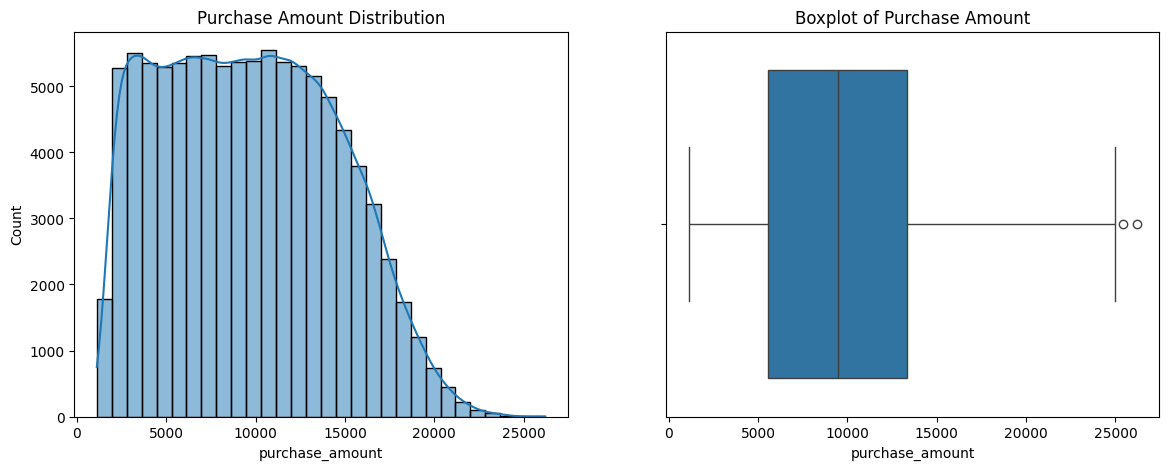

2025-02-24 23:59:47,732 - INFO - Plotting log-transformed purchase amount distribution.


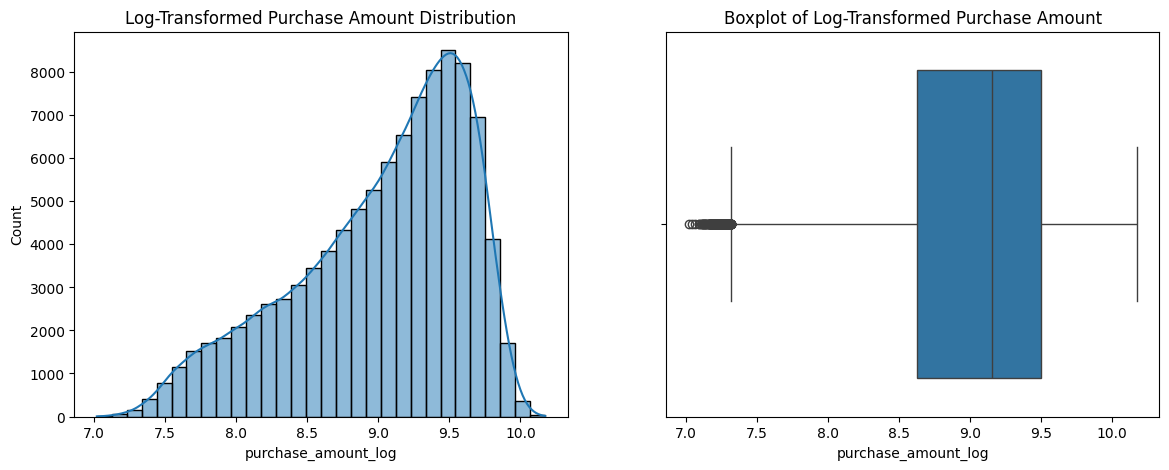

C:\Users\mahin\AppData\Local\Temp\ipykernel_13176\3417376992.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['region'], y=df['purchase_amount'], estimator=np.mean, ci=None, palette='viridis')
C:\Users\mahin\AppData\Local\Temp\ipykernel_13176\3417376992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['region'], y=df['purchase_amount'], estimator=np.mean, ci=None, palette='viridis')


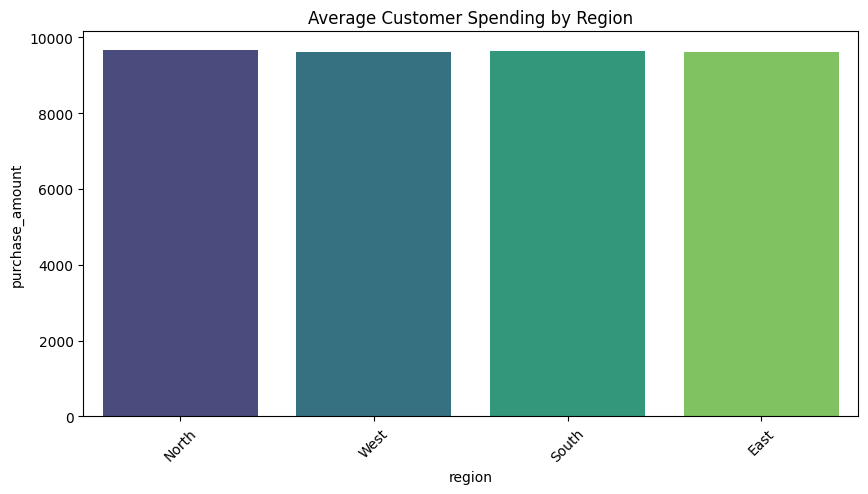

2025-02-24 23:59:49,138 - INFO - Plotting purchase frequency distribution.
C:\Users\mahin\AppData\Local\Temp\ipykernel_13176\971941093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['purchase_frequency'], palette='coolwarm')


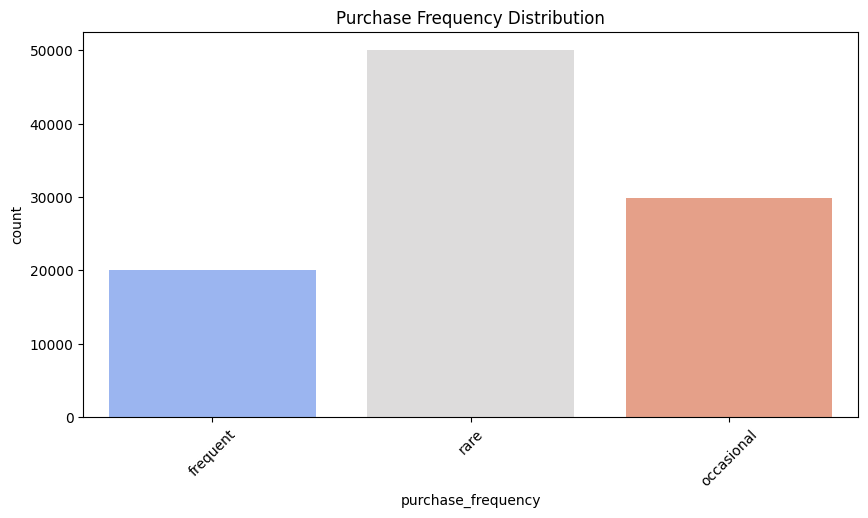

In [27]:
df = load_data(CLEANED_DATA_PATH)
if df is not None:
    data_overview(df)
    plot_purchase_distribution(df)
    plot_log_purchase_distribution(df)  
    plot_spending_by_region(df)
    plot_purchase_frequency(df)

## **9️⃣ Summary & Next Steps**
✅ EDA performed successfully.
✅ Next, move to `04_regression_analysis.ipynb` for predictive modeling.